## IMERSÃO DE DADOS ALURA


ANÁLISE DE DADOS DO ENEM 2019 - RJ

Neste notebook contém um projeto de análise de dados do ENEM 2019 referente ao estado do Rio de Janeiro. É um projeto desenvolvido durante a Imersão de Dados promovida pelo Alura.
Os dados são reais e podem ser encontrados no site do INEP.  

   

### 1 - BIBLIOTECAS UTILIZADAS 

In [ ]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 2 - IMPORTAÇÃO DATASET

In [ ]:
# importando os dados do ENEM 2019 do RJ
estado = "rj"

uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-11-18 17:46:14--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/rj.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rj.csv.zip [following]
--2020-11-18 17:46:14--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rj.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rj.csv.zip [following]
--2020-11-18 17:46:14--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rj.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
# lendo os dados
dados = pd.read_csv(arquivo,sep=";")
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,10600,190001015227,2019,3302056,Italva,33,RJ,32,F,1,3,1,1505106.0,Óbidos,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CDADCADAABDDCEBABCBCEBABCECAAAEBDEEDCBDDCCDBA,99999ABCEDBCEEACBEABAAEEEDCBDEBAAABDBDCADECDDE...,BBAEBDACABEABBDDEACEDCDCBADDCACDBDABAECADECAE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,120.0,120.0,140.0,640.0,B,B,A,A,5,C,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
1,21074,190001025702,2019,3305109,São João de Meriti,33,RJ,32,M,1,3,1,3301702.0,Duque de Caxias,33.0,RJ,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,F,F,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A
2,22657,190001027285,2019,3304557,Rio de Janeiro,33,RJ,26,M,1,3,1,1100254.0,Presidente Médici,11.0,RO,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,D,1,E,A,B,E,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B
3,30365,190001034993,2019,3304557,Rio de Janeiro,33,RJ,19,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDBCDEDCAACCEDAAEECABDDECDBDBABADCAABBBDEECAB,BDDB*99999DABEBDDAEBDADECAACDBDACEBBEBEACDCDBB...,ECDBADBCCDECDCBBACAEBACBBCDBEBCABDEACEEBDCBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,100.0,100.0,560.0,C,E,B,D,3,B,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,B,A,A,B
4,60937,190001065566,2019,3304557,Rio de Janeiro,33,RJ,22,F,1,3,1,1501402.0,Belém,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,B,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,A


### 3 - CONHECENDO O CONJUNTO DE DADOS

In [ ]:
# tamanho do dataset referente aos dados do estado de RJ
dados.shape
print('O dataset tem {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

O dataset tem 338710 linhas e 137 colunas


In [ ]:
# colunas do dataset
dados.columns.values

array(['ID', ' NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPL

### 4 - SELECIONADO AS COLUNAS UTILIZADAS NA ANÁLISE



In [ ]:
# Selecionando apenas as colunas utilizadas na análise:
colunas = [" NU_INSCRICAO", "NU_IDADE", "TP_SEXO", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_ST_CONCLUSAO",
           "TP_ESCOLA", "TP_ANO_CONCLUIU", "TP_ENSINO", "IN_TREINEIRO", "TP_DEPENDENCIA_ADM_ESC",
           "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "NU_NOTA_CN",
           "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q003",
           "Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013", "Q014",
           "Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025 "]

NU_INSCRICAO

NU_IDADE

TP_SEXO

TP_ESTADO_CIVIL

TP_COR_RACA – (Não declarado, Branca, Preta, Parda, Amarela, Indígena)

TP_ST_CONCLUSAO – situação de conclusão do Ensino Médio

TP_ESCOLA - Tipo de escola do Ensino Médio

TP_ANO_CONCLUIU - Ano de Conclusão do Ensino Médio

TP_ENSINO - Tipo de instituição que concluiu ou concluirá o Ensino Médio

IN_TREINEIRO - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

TP_DEPENDENCIA_ADM_ESC - Dependência administrativa (Escola: Federal, Estadual, Municipal, Privada)

TP_PRESENCA_CN - Presença na prova objetiva de Ciências da Natureza

TP_PRESENCA_CH - Presença na prova objetiva de Ciências Humanas

TP_PRESENCA_LC - Presença na prova objetiva de Linguagens e Códigos

TP_PRESENCA_MT - Presença na prova objetiva de Matemática

NU_NOTA_CN - Nota da prova de Ciências da Natureza

NU_NOTA_CH - Nota da prova de Ciências Humanas

NU_NOTA_LC - Nota da prova de Linguagens e Códigos

NU_NOTA_MT - Nota da prova de Matemática

NU_NOTA_REDACAO - Nota da prova de redação

Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

Q003 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você.

Q004 - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.

Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência?

Q006 - Qual é a renda mensal de sua família?

Q007 - Em sua residência trabalha empregado(a) doméstico(a)?

Q008 - Na sua residência tem banheiro?

Q009 - Na sua residência tem quartos para dormir?

Q010 - Na sua residência tem carro?

Q011 - Na sua residência tem motocicleta?

Q012 - Na sua residência tem geladeira?

Q013 - Na sua residência tem freezer?

Q014 - Na sua residência tem máquina de lavar roupa?

Q015 - Na sua residência tem máquina de secar roupa?

Q016 - Na sua residência tem forno micro-ondas?

Q017 - Na sua residência tem máquina de lavar louça?

Q018 - Na sua residência tem aspirador de pó?

Q019 - Na sua residência tem televisão em cores?

Q020 - Na sua residência tem aparelho de DVD?

Q021 - Na sua residência tem TV por assinatura?

Q022 - Na sua residência tem telefone celular?

Q023 - Na sua residência tem telefone fixo?

Q024 - Na sua residência tem computador?

Q025 - Na sua residência tem acesso à Internet?

In [ ]:
# Alterando o conjunto de dados para conter somente as colunas necessárias
dados = dados[colunas]
dados

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001015227,32,F,1,3,1,1,13,1.0,0,NaN,1,1,1,1,464.4,444.7,469.8,419.8,640.0,B,B,A,A,5,C,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
1,190001025702,32,M,1,3,1,1,13,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,F,E,F,F,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A
2,190001027285,26,M,1,3,1,1,9,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,E,D,D,1,E,A,B,E,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B
3,190001034993,19,F,1,3,2,2,0,1.0,0,NaN,1,1,1,1,423.1,499.0,522.1,431.8,560.0,C,E,B,D,3,B,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,B,A,A,B
4,190001065566,22,F,1,3,1,1,4,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,C,A,B,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338705,190006118895,18,F,0,3,2,2,0,1.0,0,2.0,1,1,1,1,508.4,491.7,530.6,508.5,620.0,C,C,B,B,5,D,A,C,C,A,A,B,B,B,A,B,A,B,D,A,B,E,B,A,B
338706,190006118896,52,F,2,3,1,1,13,1.0,0,NaN,1,1,1,1,426.3,411.2,444.7,410.9,580.0,B,A,C,B,4,D,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,B,B,A,A
338707,190006118897,23,F,1,1,1,1,4,1.0,0,NaN,1,1,1,1,528.4,474.7,544.1,583.7,740.0,B,E,B,B,6,G,A,D,D,B,A,B,B,B,B,B,A,A,D,B,B,E,A,B,B
338708,190006118898,32,F,1,2,1,1,13,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,E,C,B,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A


### 5 - TRATANDO OS DADOS

In [ ]:
# criando uma variável contendo a nota das provas e inserindo os valores em uma coluna de totais
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001015227,32,F,1,3,1,1,13,1.0,0,NaN,1,1,1,1,464.4,444.7,469.8,419.8,640.0,B,B,A,A,5,C,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,2438.7
1,190001025702,32,M,1,3,1,1,13,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,F,E,F,F,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,0.0
2,190001027285,26,M,1,3,1,1,9,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,E,D,D,1,E,A,B,E,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B,0.0
3,190001034993,19,F,1,3,2,2,0,1.0,0,NaN,1,1,1,1,423.1,499.0,522.1,431.8,560.0,C,E,B,D,3,B,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,B,A,A,B,2436.0
4,190001065566,22,F,1,3,1,1,4,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,C,A,B,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,C,A,A,A,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338705,190006118895,18,F,0,3,2,2,0,1.0,0,2.0,1,1,1,1,508.4,491.7,530.6,508.5,620.0,C,C,B,B,5,D,A,C,C,A,A,B,B,B,A,B,A,B,D,A,B,E,B,A,B,2659.2
338706,190006118896,52,F,2,3,1,1,13,1.0,0,NaN,1,1,1,1,426.3,411.2,444.7,410.9,580.0,B,A,C,B,4,D,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,B,B,A,A,2273.1
338707,190006118897,23,F,1,1,1,1,4,1.0,0,NaN,1,1,1,1,528.4,474.7,544.1,583.7,740.0,B,E,B,B,6,G,A,D,D,B,A,B,B,B,B,B,A,A,D,B,B,E,A,B,B,2870.9
338708,190006118898,32,F,1,2,1,1,13,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,E,C,B,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0


In [ ]:
# Conferindo se existe valores NaN(candidatos faltantes)
dados[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.4,444.7,419.8,469.8,640.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,423.1,499.0,431.8,522.1,560.0
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
338705,508.4,491.7,508.5,530.6,620.0
338706,426.3,411.2,410.9,444.7,580.0
338707,528.4,474.7,583.7,544.1,740.0
338708,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Podemos conferir também desta outra forma se existe valores de faltantes.
# valores True confirmam que contém valores de candidatos faltantes
dados[provas].isna().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,False,False,False,False,False
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,True,True,True,True


In [ ]:
# Para uma melhor análise, será utilizado apenas notas totais não zeradas
dados = dados.query('NU_NOTA_TOTAL != 0')
dados[provas]


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.4,444.7,419.8,469.8,640.0
3,423.1,499.0,431.8,522.1,560.0
5,549.1,642.3,673.9,573.9,700.0
7,363.2,413.4,488.6,489.7,400.0
8,508.0,605.6,580.4,579.0,900.0
...,...,...,...,...,...
338704,506.3,555.0,632.7,583.5,560.0
338705,508.4,491.7,508.5,530.6,620.0
338706,426.3,411.2,410.9,444.7,580.0
338707,528.4,474.7,583.7,544.1,740.0


In [ ]:
# Conferindo se no dataset contém idades incorretas
dados["NU_IDADE"].value_counts().sort_index()

6      1
9      1
12     2
13     4
14    66
      ..
82     2
83     1
84     1
86     1
88     1
Name: NU_IDADE, Length: 77, dtype: int64

In [ ]:
# Os alunos com menos de 13 anos terão a idade substituída pela mediana
# Para relizar o ENEM o aluno tem que estar cursando o Ensino Médio
# verificando quantos candidatos estão com a idade menor que 13
dados['NU_IDADE'][dados['NU_IDADE'] < 13].count()

4

In [ ]:
print(dados['NU_IDADE'].median())

19.0


In [ ]:
# Substituindo as idades com valores menores que 13, pelo valor da mediana
dados.loc[dados.NU_IDADE < 13, 'NU_IDADE'] = 19

In [ ]:
# Conferindo se foi feita a substituição
dados['NU_IDADE'][dados['NU_IDADE'] < 13].count()

0

### 6 - ANÁLISE EXPLORATÓRIA:

- Idade
- Distribuição de gênero
- Cor(raça)
- Renda familiar

In [ ]:
# Qual a distribuição da idade dos candidatos?
dados['NU_IDADE'].describe()

count    259771.000000
mean         21.738466
std           7.915813
min          13.000000
25%          18.000000
50%          19.000000
75%          22.000000
max          88.000000
Name: NU_IDADE, dtype: float64

75% dos candidatos que realizaram o ENEM 2019 no estado do Rio de Janeiro tem até 22 anos

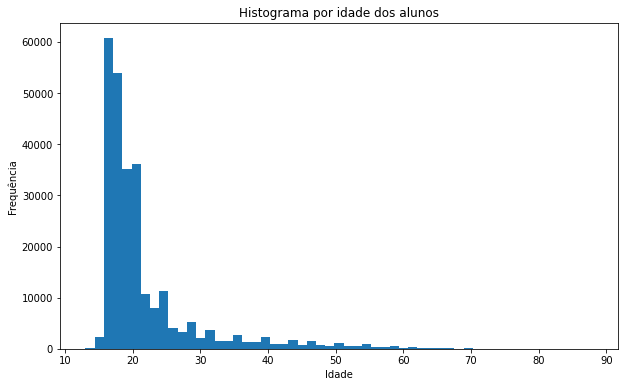

In [ ]:
dados.NU_IDADE.plot.hist(bins = 55, figsize = (10, 6))
plt.title('Histograma por idade dos alunos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

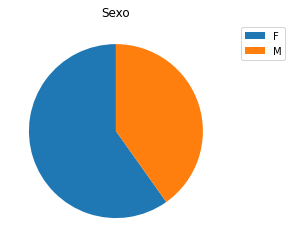

In [ ]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
# Quase 60% dos candidatos são do gênero feminino
# Definindo a quantidade
labels = dados.TP_SEXO.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(dados.TP_SEXO.value_counts(), startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

In [ ]:
# Conferindo o resultado do gráfico acima
labels2 = dados.TP_SEXO.value_counts() / len(dados)*100
labels2


F    59.831929
M    40.168071
Name: TP_SEXO, dtype: float64

In [ ]:
# Notas totais de acordo com o gênero
dados.groupby('TP_SEXO')['NU_NOTA_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,155426.0,2596.100208,505.722209,240.0,2328.3,2598.3,2918.2,4167.1
M,104345.0,2671.372035,520.341083,140.0,2394.2,2702.0,3018.2,4150.0


Text(0.5, 1.0, 'Boxplot das notas totais por gênero')

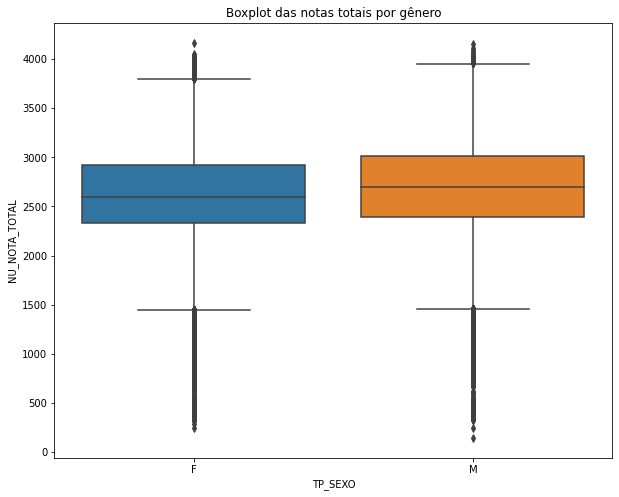

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="TP_SEXO", y = "NU_NOTA_TOTAL", data = dados)
plt.title("Boxplot das notas totais por gênero")

In [ ]:
# ordenando a renda
# A = Nenhuma renda
# B a P = Renda de R$998,00 até R$19.960,00 
# Q = Renda mais que R$19.960,00 
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

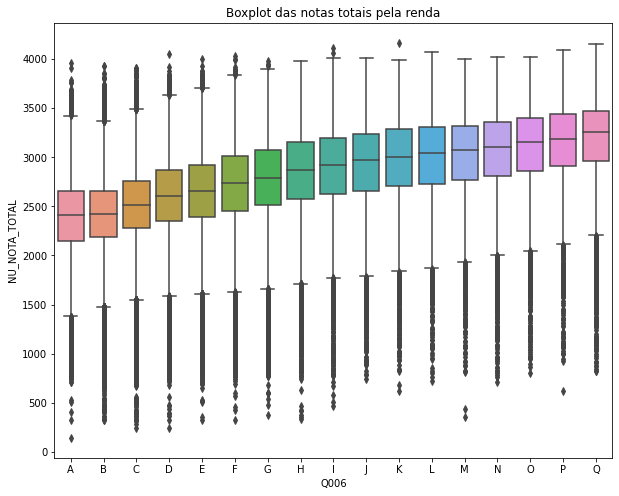

In [ ]:
# Notas totais em relação a renda familiar
# A renda do candidato tem maior influência no desempenho nas provas
# quanto menor a renda, maior o número de outliers nas notas superiores
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas totais pela renda")

Text(0.5, 1.0, 'Boxplot das notas de totais pela renda e gênero')

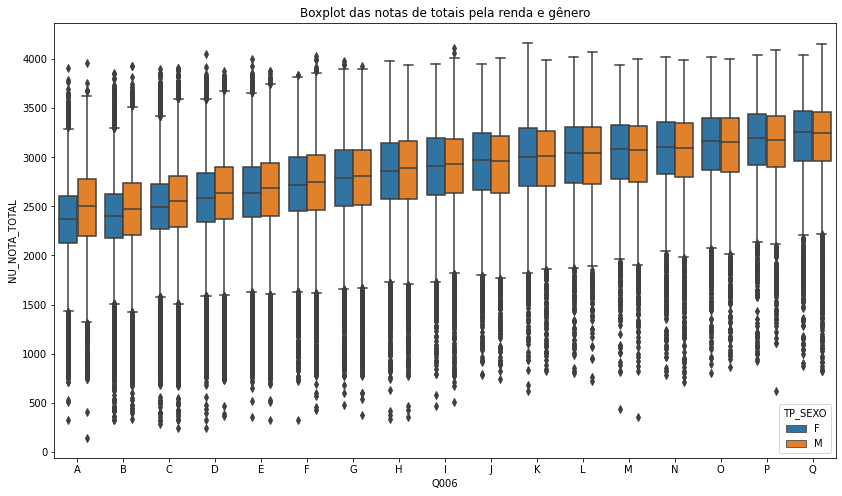

In [ ]:
# Notas totais em relação a renda e gênero
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, 
            hue = "TP_SEXO", order = renda_ordenada)
plt.title("Boxplot das notas de totais pela renda e gênero")

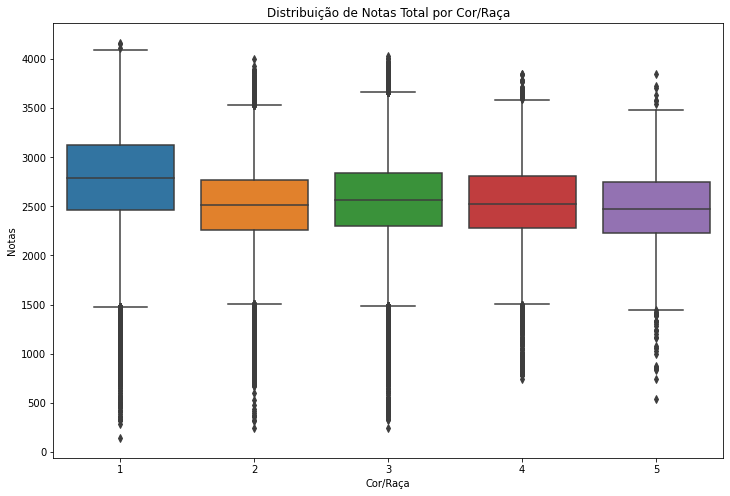

In [ ]:
# Cor/Raça
# retirando os dados não declarados de tipo de cor/raça
dados_raca = dados.query('TP_COR_RACA != 0')

# ordenando os dados
raca_ordenada = dados_raca['TP_COR_RACA'].unique()
raca_ordenada.sort()


plt.figure(figsize=(12,8))
sns.boxplot(x="TP_COR_RACA",y="NU_NOTA_TOTAL",data=dados_raca, order = raca_ordenada);

#organizando o gráfico
plt.xlabel('Cor/Raça');
plt.ylabel('Notas');
plt.title('Distribuição de Notas Total por Cor/Raça');

Raça/Cor

0 = Não declarado

1 = Branca

2 = Preta

3 = Parda

4 = Amarela

5 = Indígena 


Pode-se observar que candidatos declarados de cor 'branca' tem notas maiores que outros candidatos.

In [ ]:
# Correlação entre as notas
correlacao = dados[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.669162,0.640540,0.639788,0.511730
NU_NOTA_CH,0.669162,1.000000,0.611945,0.737014,0.532760
NU_NOTA_MT,0.640540,0.611945,1.000000,0.588093,0.512565
NU_NOTA_LC,0.639788,0.737014,0.588093,1.000000,0.530755
NU_NOTA_REDACAO,0.511730,0.532760,0.512565,0.530755,1.000000


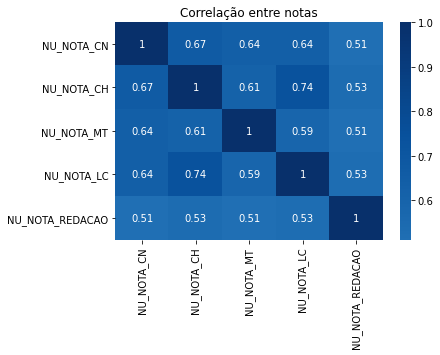

In [ ]:
# Visualizando as correlações
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)
plt.title('Correlação entre notas')
plt.show()

### 7 - MACHINE LEARNING:

In [ ]:
# Prever a nota de matemática baseada nas outras notas

# Seleção de variáveis preditoras
notas_entrada = ["NU_NOTA_CN","NU_NOTA_CH", "NU_NOTA_LC","NU_NOTA_REDACAO"]

# Variável a ser prevista
notas_saida = ["NU_NOTA_MT"]

#deixando apenas os dados preenchidos
dados = dados[provas].dropna()

In [ ]:
# Criando objetos
x = dados[notas_entrada]
y = dados[notas_saida]

In [ ]:
from sklearn.model_selection import train_test_split

# Definindo a taxa de split
split_test_size = 0.30

# Criando dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = split_test_size)

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_teste)/len(dados.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [ ]:
# treinando o modelo
from sklearn.dummy import DummyRegressor

modelo = DummyRegressor()
modelo.fit(x_treino, y_treino)


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
# Verificando a exatidão no modelo nos dados de treino
from sklearn.metrics import mean_squared_error

predicoes_matematica = modelo.predict(x_teste)

print('Erro médio quadrático do Modelo:',mean_squared_error(y_teste, predicoes_matematica))

Erro médio quadrático do Modelo: 12862.72641005179
